#### Carnegie Mellon University - Tepper School of Business
#### 46-881 - Programming in R and Python
#### 22/23 - Mini 2 - Sections MO2 - Farahat
---

# Deliverable 2 
**Due November 16th at 2:59 a.m. Eastern**

Please provide your name and Andrew ID below:

- Name (Last, First): Lerma, Rodolfo

- Andrew ID: rlerma

---

*This deliverable consists of **two** Problems. Both problems require you to code in Python and answer one or more questions. Save a copy of this notebook and provide your solution by inserting code or Markdown text files as appropriate.*

*You will need to submit two files through Canvas: 1) a completed Jupyter notebook (extension .ipynb) with your code and answers to each question (this file); and 2) an html rendering of your completed Jupyter notebook.*

## Problem 1 (60 points)

The SIR model is the original and simplest (in fact, *simplistic*) model of disease spread in epidemiology. It is a *compartmental model* where each individual in a population is classified as being in exactly one of 3 states at any given time: **S**usceptible to infection, **I**nfectious (i.e. infected and capable of infecting susceptible individuals), or **R**ecovered (or "removed"). The model was developed by Kermack and McKendrick in 1927. Many improved predictive models have since been developed for disease spread. In this problem you will use Python to implement and explore this model.

Let S(t), I(t), and R(t) denote, respectively, the number of individuals in a given population who are susceptible, infectious, and recovered on day t. The model utilizes two parameters: Beta and Gamma. For a population of size N, the time-dynamics of the model are as follows:
- S(t+1) = S(t) - Beta * I(t) * S(t) / N
- I(t+1) = I(t) + Beta * I(t) * S(t) / N - Gamma * I(t)
- R(t+1) = R(t) + Gamma * I(t) 

The ratio Beta / Gamma is sometimes referred to as the R0 (R naught) of the disease.

**Note:**

Reference in this [link](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/)

Develop a Python model of the above SIR model and use it to answer the following questions. Assume a scenario where N = 1000, S(0) = 990, I(0) = 10, Beta = 0.10, and Gamma = 0.05.

In [1]:
#Loading basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Setting the initial variables for the SIR model
N = 1000 #population size
S0 = 990 #The number of individuals in a given population who are susceptible on day t (initial day)
I0 = 10 # The infectious on day t.
R0 = 0 #At the beginning recovered people is zero (N = S + I + R at any given time)
beta = 0.10 
gamma = 0.05
r0 = beta/gamma

In [3]:
#Empty lists to store the values
S = []
I = []
R = []
time = []

#Initial values
St = S0 #The number of individuals in a given population who are susceptible on day t (initial day)
It = I0 #The infectious on day t.
Rt = R0 #At the beginning recovered people is zero (N = S + I + R at any given time)

for i in range(1,401):
    
    #Model
    St = St - (beta * It * St/N)
    It = It + (beta * It * St/N) - (gamma * It)
    Rt = Rt + (gamma * It)
    
    #Appendig variables
    time.append(i)
    S.append(St)
    I.append(It)
    R.append(Rt)

In [4]:
max_infected = max(I)
print('The Max number of people Infected at the pick of the disease is: ' + str(round(max_infected)))
print('According to the model the pick of the infection is at day: ' + str(pd.Series(I).idxmax() + 1)) #Adding 1 to the index since it starts at Zero

The Max number of people Infected at the pick of the disease is: 155
According to the model the pick of the infection is at day: 89


In [5]:
count = 0
indexes = []
for i in I:
    if i > 120:
        count+=1
        indexes.append(I.index(i))

print('The number of days with people infected greater than 120 is: ' + str(count) + ' days')
print('The first day crossing over the 120 mark is the: ' + str(indexes[0]) + 'th')

The number of days with people infected greater than 120 is: 52 days
The first day crossing over the 120 mark is the: 64th


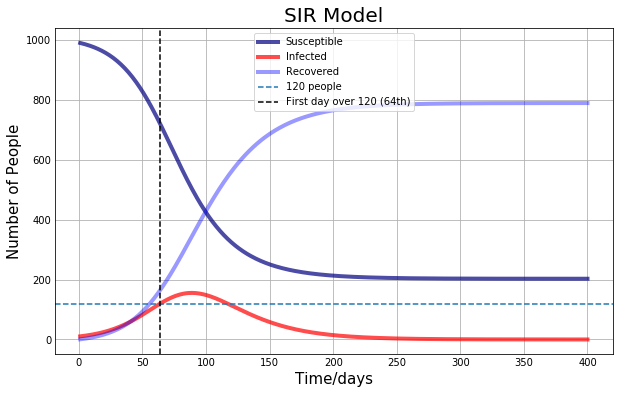

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(time, S, 'navy', alpha=0.7, lw=4, label = 'Susceptible')
ax.plot(time, I, 'red', alpha=0.7, lw=4, label = 'Infected')
ax.plot(time, R, 'blue', alpha=0.4, lw=4, label = 'Recovered')
plt.axhline(y = 120, linestyle = '--', label = '120 people')
plt.axvline(x = 64, color = 'black', linestyle = '--', label = 'First day over 120 (64th)')
ax.set_xlabel('Time/days', size = 15)
ax.set_ylabel('Number of People',size = 15)
ax.set_title('SIR Model',size = 20)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
legend = ax.legend(loc='upper center')
plt.show()

#### Part(a)
`Suppose our healthcare system has a capacity to accommodate a maximum of 120 infectious persons. Is this capacity sufficient according to the model?`


*No, at the pick of the disease the maximum number of people will be 155. And during 52 days the number of people infected will be higher than 120. Then no, 120 is not enough.*

#### Part (b)
`Now suppose that our healthcare system can currently accommodate only 120 infectious persons. However, its capacity can be increased to accommodate 180 infectious persons in 2 months. Is this current capacity and expansion plan sufficient according to the model?`

*Yes, based on the analysis above the first time we get over 120 people is over the first 2 months (64th day) and the maximum of people infected will be around 155. Therefore expanding over the first 2 months to 180 should be enough.*

----

## Problem 2 (40 points)

Suppose you drive a car whose fuel efficiency is 18 miles per gallon and whose gas tank size is 16 gallons. Gas prices fluctuate according to a **uniform distribution** ranging from 3 dollars per gallon to 5 dollars per gallon. That is, prices remain average equal to 4 dollars per gallon but fluctuate each day according to this uniform distribution. Every day you drive your car for exactly 10 miles.

You are contemplating two gas filling strategies:
- *“Fill-it up” strategy*: You wait till the tank is (almost) empty then fill the entire tank;
- *“30-dollar” strategy*: You wait till the tank is (almost) empty then fill in only 30 dollars worth of gas.

Assume that there are many gas stations around, so you can time your visits almost exactly when the tank is empty. Assume also that any inconvenience from visiting the gas station is negligible. Your only objective is to minimize your gas expenditure.

***Construct a simulation model in Python to determine if one strategy is more economical than the other (and, if so, by how much).*** 

In [7]:
#Given information
mpg = 18
gas_tank = 16
drive = 10
money = 30

#Uniform distribution
mean = 4
std_dev = 2/np.sqrt(12) #Since this is a Uniform distribution sigma = (b-a)/sqrt(12)

#Technically a full thank give us:
full_tank_miles = mpg * gas_tank
print('A full tank give us ' + str(full_tank_miles) + ' miles')

days_to_fill = full_tank_miles/drive
print('A full tank lasts ' + str(days_to_fill) + ' days')

A full tank give us 288 miles
A full tank lasts 28.8 days


Based on the information provided we know that a full tank based on the expected consumption of `10 miles/day`, give us `28.8 days` of usage. But, for simplicity it is going to be assumed that the price of the gas stays the same during the day, therefore the number of days will be rounded up to `29 days` for a full tank.

In [26]:
#Example to see if the distribution makes sense:
av = []
rng = np.random.default_rng(seed=40)
for i in range(1000): #Doing this for 1000 days
    value = rng.uniform(3, 5, 30) #Similar to take 30 samples out of different people (places with similar distribution)
    avg = np.mean(value)
    av.append(avg)

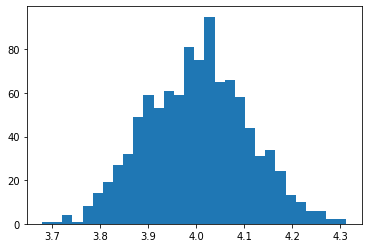

In [27]:
plt.hist(av, bins=30)
plt.show()

In [9]:
# #Case 1: Fixed time
# expected_money = [] #This going to vary based on the price of the gas at a given time
# index1_list_list = [] #This is going to tell us the interval between each re-fill (which is constant for case 1)

# #Case 1: Fixed time
# expected_money2 = [] #This will return the constant money that in this case we use to re-fill the car
# index2_list_list = [] #This is the interval of days between refills (will vary per experiment)

# m = 5 #Number of times the experiment is run
# for j in range(m):
    
#     rng = np.random.default_rng(seed=j) #random number generator/different distribution per experiment
    
#     #Case 1: Fixed time
#     index1 = 1
#     index1_list = [1]
#     money = []

#     #Case 2: Fixed money
#     index2 = 1
#     index2_list = [1]
#     money2 = []
    
#     n = 1000 #Number of days running the simulation (around 3 years (1095 days))
#     for i in range(1,n):

#         #Calculations to get the amount spent every 29 days to fill the tank
#         price_gas = rng.uniform(low=3, high=5) 
        
#         #First Case: Fix time (29 days based on m1/10)
#         y1 = gas_tank * price_gas #money needed to fill the tank
#         m1 = gas_tank * mpg #Miles available with full tank
#         t1 = m1/10 #Days available with full tank
        
#         #Second Case: Fix Money (30 dollars) 
#         y2 = 30 #Money for gas
#         m2 = 30/price_gas * mpg #Miles with noted 30 dollars
#         t2 = m2/10 #Days until next fuel refill
        
#         #Appending variable money        
#         money.append(y1)
#         money2.append(y2)
        
#         #Get the days interval between refills
#         if index1 < 2:
#             index1 = index1 + round(t1)
#             index1_list.append(index1) #Appending first index

#         elif index1 == i:
#             x = index1 + round(t1)
#             if x <= n:
#                 index1 = index1 + round(t1) 
#                 index1_list.append(index1) #Appending next indexes
#             else:
#                 continue
        
#         #Get the day intervals between refills                   
#         if index2 < 2:
#             index2 = index2 + round(t2)
#             index2_list.append(index2)

#         elif index2 == i:
#             index2 = index2 + round(t2)
#             index2_list.append(index2)       

#     #Appending to create a list of lists for Case 1
#     expected_money.append(money)
#     index1_list_list.append(index1_list)
    
#     #Appending to create a list of lists for Case 2
#     expected_money2.append(money2)
#     index2_list_list.append(index2_list)

In [10]:
# #First Case
# average_money_list = []
# for i in range(np.shape(expected_money)[1]):
#     averge_money = np.mean([item[i] for item in expected_money])
#     average_money_list.append(averge_money)

In [11]:
# #Second Case
# average_day_list = []
# for i in range(np.shape(expected_money)[1]):
#     averge_money = np.mean([item[i] for item in expected_money])
#     average_money_list.append(averge_money)

In [12]:
# index2 = 1
# index2_list = [1]
# money2 = []

# time = []

# n = 100
# rng = np.random.default_rng(seed=85) #random number generator

# for i in range(1,n):

#     #Calculations to get the amount spent every 29 days to fill the tank
#     price_gas = rng.uniform(low=3, high=5) 

#     #First Case: Fix time (29 days based on m1/10)
#     y1 = gas_tank * price_gas #money needed to fill the tank
#     m1 = gas_tank * mpg #Miles available with full tank
#     t1 = m1/10 #Days available with full tank

#     #Second Case: Fix Money (30 dollars) 
#     y2 = 30 #Money for gas
#     m2 = 30/price_gas * mpg #Miles with noted 30 dollars
#     t2 = m2/10 #Days until next fuel refill
#     time.append(round(t2))

#     #Appending variable money        
#     money.append(y1)
#     money2.append(y2)

#     #Get the days interval between refills
# #     if index1 < 2:
# #         x = index1 + t1
# #         if x <= n:
# #             index1 = index1 + round(t1) 
# #             index1_list.append(index1) #Appending next indexes

# #     elif index1 == i:
# #         x = index1 + t1
# #         if x <= n:
# #             index1 = index1 + round(t1) 
# #             index1_list.append(index1) #Appending next indexes
        
#     #Get the day intervals between refills                   
#     if index2 < 2:
#         index2 = index2 + round(t2)
#         index2_list.append(index2)

#     elif index2 == i:
#         index2 = index2 + round(t2)
#         index2_list.append(index2)

In [13]:
# n = 12
# index2 = 1
# i = 6
# rng = np.random.default_rng(seed=85)
# price_gas = rng.uniform(low=3, high=5) 

# y2 = 30 #Money for gas
# m2 = 30/price_gas * mpg #Miles with noted 30 dollars
# t2 = m2/10 #Days until next fuel refill

# #Get the days interval between refills
# #     if index1 < 2:
# #         x = index1 + t1
# #         if x <= n:
# #             index1 = index1 + round(t1) 
# #             index1_list.append(index1) #Appending next indexes

# #     elif index1 == i:
# #         x = index1 + t1
# #         if x <= n:
# #             index1 = index1 + round(t1) 
# #             index1_list.append(index1) #Appending next indexes

# #Get the day intervals between refills                   
# if index2 < 2:
#     x2 = index2 + t2
#     print('yes')
#     if x2 <= n:
#         index2 = index2 + round(t2)
#         print(index2)

# elif index2 == i:
#     x2 = index2 + t2
#     if x2 <= n:
#         index2 = index2 + round(t2)
#         print('index2')     
        
# else:
#     print('BAD CODE')

In [14]:
#First option: Fix time and miles and variable money

#Empty lists to get values from for loop
list_of_spent = []
cumulative_spent = []
days = []
spent2 = 0
rng = np.random.default_rng(seed=40) #random number generator

for i in range(1,1000,29):
    
    #Calculations to get the amount spent every 29 days to fill the tank
    price_gas = rng.uniform(low=3, high=5) 
    spent = gas_tank * price_gas
    
    #If statement to get the cummulative sum
    if spent2 < 1:
        spent2 = spent
    else:
        spent2 = spent2 + spent
        
    #Appending the value at each iteration to the lists above    
    list_of_spent.append(spent)
    cumulative_spent.append(spent2)  
    days.append(i)

In [15]:
#Second Strategy: Fix money and variable time and miles

#Empty lists to collect values from for loop
list_of_spent_2 = []
cumulative_spent_2 = []
days_2 = []
cumulative_days_2 = []
spent2_2 = 0
days_initial = 0
price_list = []

rng = np.random.default_rng(seed=40)
for i in range(1,75):
    
    #Calculations to get the number of days that will last the 30 dollars every time assuming a uniform distribution
    price_gas = rng.uniform(3, 5) 
    amount_of_gas = money/price_gas
    miles_with_gas = amount_of_gas * mpg #18 mpg times the amount of gas is equal to the miles that we can use
    days_with_gas = round(miles_with_gas/drive) #The car is used 10 miles daily - this should be rounded to get a full day
    
    #If statement to get the cummulative sum of the money spent eveytime (30+30+30...)
    if spent2_2 < 1:
        spent2_2 = money
    else:
        spent2_2 = spent2_2 + money
        
    #If statement to get the cummulative sum of the days that the 30 dollars are getting us everytime 15+12+17...
    if days_initial < 1:
        days_initial = days_with_gas
    else:
        days_initial = days_initial + days_with_gas
    
    #Appending the values to the empty lists above
    list_of_spent_2.append(money)
    cumulative_spent_2.append(spent2_2)
    days_2.append(days_with_gas)
    cumulative_days_2.append(days_initial)
    price_list.append(price_gas)

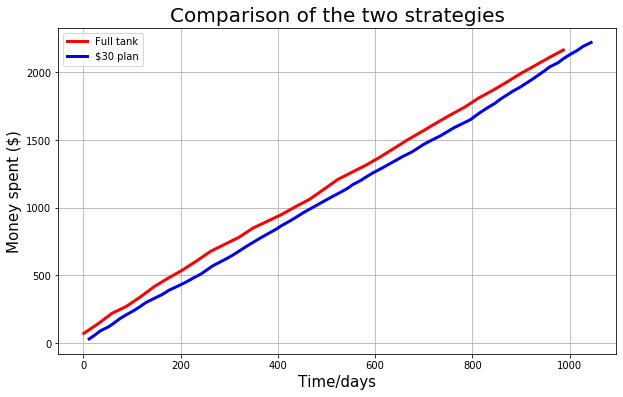

In [16]:
#Plot for comparison of the 2 strategies
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(days, cumulative_spent, linewidth=3, color = 'red', label = 'Full tank')
ax.plot(cumulative_days_2, cumulative_spent_2, linewidth=3, color = 'blue', label = '$30 plan')
ax.set_xlabel('Time/days', size = 15)
ax.set_ylabel('Money spent ($)',size = 15)
ax.set_title('Comparison of the two strategies',size = 20)
legend = ax.legend(loc='upper left')
plt.grid()
plt.show()

----